**Coursebook: Regression Model**
- Part 2 of Introduction to Machine Learning in Python
- Course Length: 6 Hours
- Last Updated: September 2022

___

- Developed by [Algoritma](https://algorit.ma)'s product division and instructors team

# Background

The coursebook is part of the **Introduction to Machine Learning in Python** prepared by [Algoritma](https://algorit.ma). The coursebook is intended for a restricted audience only, i.e. the individuals and organizations having received this coursebook directly from the training organization. It may not be reproduced, distributed, translated or adapted in any form outside these individuals and organizations without permission.

Algoritma is a data science education center based in Jakarta. We organize workshops and training programs to help working professionals and students gain mastery in various data science sub-fields: data visualization, machine learning, data modeling, statistical inference etc.

## Training Objectives

We'll start by getting used in working with Jupyter Notebook and programming basics. In this coursebook we will cover:

- **Linear Model**  
    - Least Square Regression  
    - Simple Linear Regression  
    - Leverage and Influence  
    - Linear Model Prediction  
- **Model Interpretation**
    - Model Interpretation  
    - Arriving at $\beta$ coefficient  
    - R-squared  
    - Confidence Interval  
- **Multivariate Regression**  
    - Feature Selection  
    - Model Diagnostics  
    - Limitation of Regression Model

By the end of this course, you'll be working on a **Learn-by-Building** module to create a data exploratory analysis project to apply what you have learned on provided dataset and attempt to answer all the given questions. This final part is considered as a Graded Assignment so make sure you do well on the assignment.

Before going into our main topic for this coursebook, let's import the packages we are going to use:

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Introduction to Machine Learning

Machine learning on a very basic level, refers to a sub-field of computer science that “gives computer the ability to learn without being explicitly programmed”. Less-sensationally, it is concerned with the theory and application of statistical and mathematical methods to arrive at a particular objective without following a set of strictly defined and rigid pre-determined rules.

The most common machine learning is divided into two types, namely **supervised learning** and **unsupervised learning**. The difference between the two is that when we talk about **supervised learning** then we talk about predictions of a value because in supervised learning the data we will analyze has a variable target.

When the prediction value is numerical (think oil prices, rainfall, quarterly sales, blood pressure etc), it is generally referred to as a “regression” problem. This is in contrast with “classification” problems, a general term for when the value we’re trying to predict is categorical (loan defaults, email spam collection, handwriting recognition etc).

Whereas if we talk about **unsupervised learning** then we talk about data exploration because the data we want to process doesn't have a variable target. The method usually used to analyze a data using unsupervised learning is clustering or data grouping.


# Regression Model

First of all we want to learn about machine learning is about regression model. So let’s try and achieve some intuition about this important concept through the following illustration. I’m going to ahead and load some data and create a histogram from the resulting data.

It is important here to remind you that regression models are not just used in the machine learning context for numeric prediction. Regression, in fact, represent the “workhorse of data science” and is among the most practical and theoretically understood models in statistics. Data scientists well trained with this foundation will be able “to solve an incredible array of problems”. Because regression models often lead to highly interpretable models, we can (and should) consider them as a handy statistical tool that has its place in some of the most common data science tasks:

- **Prediction**: Predict the profitability of a new product category given its pilot launch sales figure
- **Statistical Modeling**: Determining a quantitative relationship between price sensitivity and average sales unit
- **Covariation**: Determining the (residual) variation in average sales unit that appears unrelated to price levels; and to investigate the impact of other external factors beyond price points in explaining the fluctuation of average sales unit

## Simple Linear Regression

### Least Square Regression

One of the terms you’ll hear a lot in this course is **least squares**. So let’s try and achieve some intuition about this important concept through the following illustration. I’m going to ahead and load some data and create a histogram from the resulting data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027CD56668D0>]],
      dtype=object)

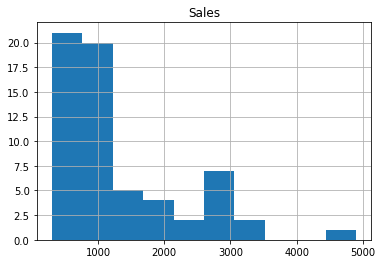

In [59]:
copymachines = pd.read_csv("data_input/copiers.csv")
copymachines = copymachines.sample(frac=1).reset_index(drop=True)

copymachines.hist(column=['Sales'])

While the sales variable take on a rather large value (with an outlier at $5000), the idea of a least squares estimate is to identify a point in our data that minimizes the sum of the squared distances between the observed data and itself. We’ll observe later that, with no predictor variables, this least squares estimate is the sample average.

Because our estimation model isn’t going to predict every observation perfectly, minimizing the average (which is equivalent to: the sum) of squared errors seem like a reasonable thing to do. If we had minimize the average absolute deviation between the data, it would lead us to the median as the least squares estimate instead of the mean. While this may seem intuitive to some, I am counting on some of you to be skeptical enough as to question me on whether the sample average would in fact lead us to the least squares estimate.

Let’s explain the importance of least squares in the context of regression models. Before I create a scatterplot of the sales data, I’d remove the far outlier (the one close to $5000) from our sample data and treat it as noise. Do note that removing outlying data (or in the general treatment of outliers) is not a decision to be taken lightly and generally involve a more methodical and lengthier treatment with respect to its implications. If done poorly, you may even be guilty of “doctoring” the data to fit your pre-determined narrative.

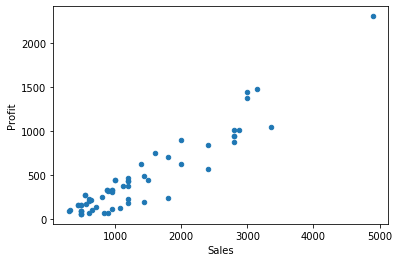

In [60]:
copymachines.plot.scatter(x='Sales', y='Profit')

In this case, without diverting too far from the subject matter of this workshop, I think you can agree that the decision is well-justified. Another useful way to think about this particular decision in this case is to consider the following trade-off:

> Do we want the presence of a numerically distant observation (potentially < ~1% of total observations) at the expense of “poorer model fit” for the rest (99%) of the observation?

To refresh your memory, recall from your Practical Statistics class that the box plot identify an observation as an outlier if it’s positioned above or below either of its “whiskers”. That, we learned is 1.5 times the interquartile range above the upper quartile and bellow the lower quartile. Let’s draw a box plot of our variable of interest:

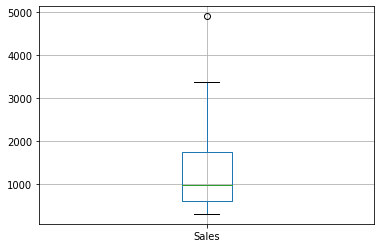

In [61]:
copymachines.boxplot(column = ['Sales'])

Eliminating the outlier data from our original sample, we can now plot Sales against Profit and attain the following graph:

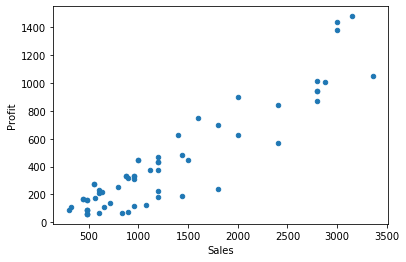

In [62]:
copymachines = copymachines[copymachines.Sales <= 3500]
copymachines.plot.scatter(x='Sales', y='Profit')

In [63]:
copymachines[['Sales','Profit']].corr()

,Sales,Profit
Sales,1.000000,0.922701
Profit,0.922701,1.000000


We can see a fairly linear relationship between the Sales and Profit variables of our `copymachines` dataset, and the objective of a simple linear regression is concerned with modeling that relationship with a straight line.

### Simple Linear Regression

Create a linear model in Python is as convenient as you’d wish it to be. We will call the `LinearRegression()` function and specify two parameters: the `x_data` for our linear model and `y_data` from which our model is built from.

`sklearn` expect our x to be a 2-dimensional array and would throw an Exception otherwise, so we'll reshape the data to have two dimension, the second being `1` for the single column feature:

In [64]:
x_data = np.array(copymachines.Sales).reshape(-1,1)
y_data = copymachines.Profit
print(x_data.shape)

(61, 1)


We'll create our linear regressor object ("model") and fit the model to our training data.

In [65]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(x_data, y_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Notice that we’ve saved `lm` as a linear model and we can now use the attributes of `lm`, such as its  coefficients to create our linear model by its `intercept` and `coef_`

In [66]:
print(lm.intercept_)
print(lm.coef_)

-83.54810084002361
[0.39443581]


Now that we have the coefficients, what does that tell us? Well the size of the coefficients tell us the effect that variable has on our target variable. We observed here that Sales have a coefficient of 0.3944 on Profit, and because 0.3944 is a positive number we know that the effect is positive: the higher the Sales, the higher the Profit. A negative coefficient will indicate the opposite, and an example of that would be Profit vs Market Saturation: the increasingly saturated market leads to decreasing profit.

Can you think of another example where we might observe a negative coefficient in a regression model?

In addition to the above information, we’ve also derived the profit equation from our linear model directly. It takes the form:

$\hat Y=β_0+β_1X_1$

Which in plain English means: Estimated Profit = Intercept + Slope * Sales

Substituting the beta coefficients into the formula hence yield: Estimated Profit = -83.548 + 0.3944 * Sales

That tells us that the profit is expected to increase by $0.3944$ when the sales price of our Copiers machine increase by $1$, and decrease by $0.3944$ as the sales price of our Copiers machine decrease by $1$. For a Copiers machine with a listed price of $0$, the profit is predicted to be negative (incurring a loss of approximately $-83.548$).

Supposed we’re expecting a sales transaction by the end of day amount $1,000$. What would our linear model predict its profit to be?

In [67]:
-83.5481 + 0.3944 *1000

310.8519

It turns out that our linear model, `lm` would predict a profit of $310.8519$. Not too bad! However, Python has built-in functions such as `*.predict()` that allow us to obtain predictions given some input data. predict expects a machine learning model as its first parameter, and in this case a data frame to predict on:

In [68]:
pred = lm.predict(x_data)
pred[:5]

array([1020.85637995,  484.42683859, 1020.85637995,  626.4245178 ,
        358.21369148])

#### R-Squared

R squared by definition is the percentage of the total variability that is explained by the linear relationship with the predictor (Regression Variation / Total Variation):

$R^2=1- \frac {∑ \limits_{i=1}^n (Y_i−\hat Y)^2}{∑ \limits_{i=1}^n(Y_i−\bar Y)^2}$

In other words, R squared can be thought of as a quantity that represents the % of the total variation that’s represented by the model. We simply take the regression variation and divide it by the total variation. In our case, it is the % of the variation in profit that is explained by the regression relationship with sales. Some facts about $R^2$:
- $R^2$ is the percentage of variation explained by the regression model
- 0 ≤ $R^2$ ≤ 1
- If we define R as the sample correlation between the predictor and the outcome, $R^2$ is simply the sample correlation squared

Because R-squared is a statistical measure of how close the data are to the fitted line, we want our model to achieve a high R-squared as it means our model has fit the data well (not always the case, but we’ll get to that later).


In [70]:
lm.score(x_data, y_data)

0.8513778092396493

## Multiple Linear Regression

Let’s build another regression model to solidify our understanding of regression models. Earlier on, we predict a future value of y given one input, x. Recall the y in our first example is the Profit and our x is the number of Sales. 

Also recall that because the number of profit depend on the number of sales, this y we’re working with is often referred to as dependent variable while the x are referred to as, you guessed it, independent variables. Can a regression model contain more than one dependent variable? Absolutely!

In the following code we take a peek at a dataset used by criminologists to study the effect of punishment regimes on crime rates. We’ll read the dataset and rename the columns. 

In [41]:
crime = pd.read_csv("data_input/crime.csv", index_col=0)

crime.columns = ['percent_m', 'is_south', 'mean_education', 
                 'police_exp60', 'police_exp59', 'labour_participation',
                 'm_per1000f', 'state_pop', 'nonwhites_per1000', 'unemploy_m24',
                 'unemploy_m39', 'gdp', 'inequality', 'prob_prison', 'time_prison',  
                 'crime_rate']

crime.head()

,percent_m,is_south,mean_education,police_exp60,police_exp59,labour_participation,m_per1000f,state_pop,nonwhites_per1000,unemploy_m24,unemploy_m39,gdp,inequality,prob_prison,time_prison,crime_rate
1,151,1,91,58,56,510,950,33,301,108,41,394,261,0.084602,26.2011,791
2,143,0,113,103,95,583,1012,13,102,96,36,557,194,0.029599,25.2999,1635
3,142,1,89,45,44,533,969,18,219,94,33,318,250,0.083401,24.3006,578
4,136,0,121,149,141,577,994,157,80,102,39,673,167,0.015801,29.9012,1969
5,141,0,121,109,101,591,985,18,30,91,20,578,174,0.041399,21.2998,1234


The dataset was collected in 1960 and a full description of the dataset wasn’t conveniently available. I use the description I gathered from the authors of the MASS package. After you rename the dataset (in your coursebook, around line 410 to line 420), the variables are:
- `percent_m`: percentage of males aged 14-24 - is_south: whether it is in a Southern state. 1 for Yes, 0 for No.
- `mean_education`: mean years of schooling
- `police_exp60`: police expenditure in 1960
- `police_exp59`: police expenditure in 1959 - labour_participation: labour force participation rate
- `m_per1000f`: number of males per 1000 females
- `state_pop`: state population
- `nonwhites_per1000`: number of non-whites resident per 1000 people
- `unemploy_m24`: unemployment rate of urban males aged 14-24
- `unemploy_m39`: unemployment rate of urban males aged 35-39
- `gdp`: gross domestic product per head
- `inequality`: income inequality
- `prob_prison`: probability of imprisonment
- `time_prison`: avg time served in prisons
- `crime_rate`: crime rate in an unspecified category 


In this part we want to predict `inequality` by `gdp` and `mean_education`:

In [72]:
x_data = np.array(crime[['gdp', 'mean_education']]).reshape(-1,2)
y_data = crime.inequality

lm_ineq= linear_model.LinearRegression()
lm_ineq.fit(x_data, y_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
lm_ineq.score(x_data, y_data)

0.8118523135850517

### Adjusted R-Squared

Using R-squared itself can be misleading in our assessment of the model fit and this is due to the one of the key limitation of this metric. R-squared, it turns out increases with every new addition of a predictor variable, even if it turns out that the variable is just completely random number - the R-squared does not decrease. As a result, a model with more independent variables may appear to have a better fit just on the merit of having more terms alone.

A model that has too many predictors also tend to overfit and worse, the regression model would “model” the random noise in our data as if they were “features”, hence producing misleading R-squared values.

The adjusted R-squared compares the explanatory power of regression models built with different number of predictors, allowing us to compare a crime rate regression model with 4 variables to another one with just 2 variables and find out if the one with 4 has achieved a higher R-squared simply because it has more predictors or if they truly lead to a better fit.

Compare the following 3 models and pay attention to it’s Adjusted R-squared value. Model 1 :

In [74]:
x_data = np.array(crime.gdp).reshape(-1,1)
y_data = crime.inequality

model_1 = linear_model.LinearRegression()
model_1.fit(x_data, y_data)

model_1.score(x_data,y_data)

0.781451183621558

In [75]:
x_data = np.array(crime[['gdp', 'labour_participation', 'm_per1000f', 'time_prison']]).reshape(-1,4)
y_data = crime.inequality

model_2 = linear_model.LinearRegression()
model_2.fit(x_data, y_data)

model_2.score(x_data,y_data)

0.7938777000682542

`model1` has one predictor variable and has an R-squared of 0.7815. We see that by adding three additional predictors (`labor_participation`, `m_per1000f`, `time_prison`) the R-squared of our model increased to 0.7939 (`model_2`). Now we say that R-squared indicates the quality of model fit, so does this necessarily means that `model_2` is a better model than `model1`? Not really. In fact, by adding three additional parameters, our Adjusted R-Squared has decreased and returned a model that has a lower Adjusted R-squared than the two other models (despite built with more predictor variables). 

So as a recap, our R-squared value tells us how well our model describes the data. It measures the extent to which the variance in our dependent variable (inequality) can be explained by the independent variables (gdp etc). However, as we increase the number of independent variables our model's R-squared value will also increase as it is incorporate any legitimate information as well as the noise introduced by these extra variables.

Adjusted R-squared on the other hand does not increases the way R-squared does because it is adjusted for the number of predictor variables in our model. It increases only when the new variable actually leads to a better prediction. While the mathematical details of the adjusted R-squared formula is beyond the scope of this workshop, I'll give you a quick proof that it does "penalizes" the r-squared based on the number of predictors the model contains.

The mathematical notation of adjusted R-squared:
$R^2_{adj} = 1-(1-R^2)\frac{n-1}{n-p-1}$

In [18]:
model_2_r2 = r2_score(y_data, model_2.predict(x_data))

n = x_data.shape[0]
p = 4

adj_r2 = 1 - (1 - (model_2_r2**2))*(n-1)/(n - p - 1)
adj_r2

0.5950267362528667